## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [31]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np

pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [32]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

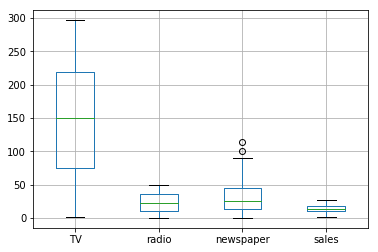

In [33]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [34]:
#plt.scatter(Fill_this_in)

C:\Users\Lingting\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011F0A5B2C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000011F20CB86D8>]], dtype=object)

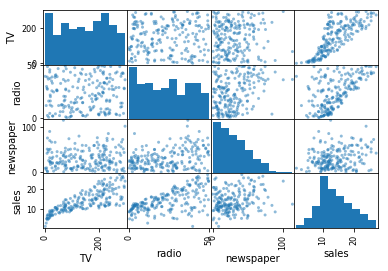

In [35]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer
Answer: Tv and radio seem to correlate with sales, whereas newspaper does not. Tv and radio both showed upward trend when plot with sales, and this means more money put in the Tv or radio results in more sales. TV shows more consistent upward trend. On the other hand, the plot between newspaper and sales looks like random dots with no correlation.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [36]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [37]:
y = df['sales']

b) Set X to be just the features described above in df

In [38]:
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Lingting\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


d) Train model on training data, and make predictions on testing data

In [40]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

y_predict = regr.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?
Answer: This is good because it is close to 1 but not exactly 1. 

In [41]:
print('Variance score: %.4f' % regr.score(X_test, y_test))

Variance score: 0.9135


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?
Answer: Yes, it does look like a good model because I can see correlation between my predict value and tested value.

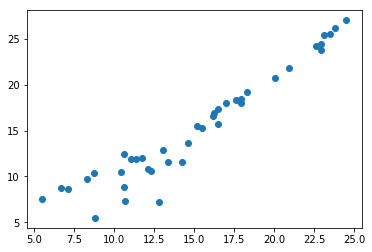

In [42]:
plt.scatter(y_predict,y_test)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?
Answer: Yes, I can measure the imporatnce of features by look at the linear regression coefficients, and I should check if the data is normalized or standardized. 

Try looking at LinearRegression().coef_

In [43]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.04352021  0.19117499 -0.00066206]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?
Answer: I can conclude that Tv and radios have positive correlation with sales, whereas the newspaper have no or minimal negtive correlaiton with sales. Positive coefficient means positive correlation, and vice versa. Large value of coefficicent means stronger correlation. We should have standardized or normalized the data from all three categories. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model
Answer:For the 3D plot, I decided to ignore the newspaper data since there is minor correlation between it and sales. To improve the performancce, I tried to expand the input by squaring both Tv and radio data. The performance of expanded dataset is better than previous method consistently. In addition, performance was also dramatically improved with regression tree. 

Variance score without newspaper data: 0.9135
P = 2 Variance score: 0.8968
Reression tree score: 0.9767


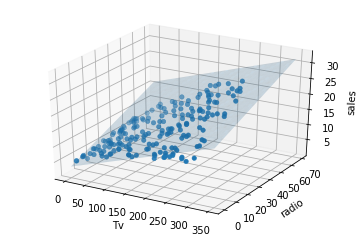

In [44]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# create new dataset without newspaper for scatter plot and hyperplane
X_New_train = X_train[['TV','radio']]
X_New_test = X_test[['TV','radio']]

# Create linear regression object
New_regr = LinearRegression()

# Train the model using the training sets
New_regr.fit(X_New_train, y_train)

# Predict the result
y_predict = New_regr.predict(X_New_test)

#Output the score
print('Variance score without newspaper data: %.4f' % New_regr.score(X_New_test, y_test))

# Plot a figure
plt3d = plt.figure().gca(projection='3d')

# Set up hyperplane
# a*Tv +b*radio - sales +d = 0 
a = regr.coef_[0]
b = regr.coef_[1]
normal = np.array([a,b, -1])
d = regr.intercept_
xx, yy = np.meshgrid(range(350), range(70))

# Calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# Plot the hyperplane
plt3d.plot_surface(xx, yy, z, alpha=0.2)

# Plot the scatter plot
plt3d.scatter(df[['TV']],df[['radio']],df[['sales']],cmap='viridis', linewidth=0.5)
plt3d.set_xlabel('Tv')
plt3d.set_ylabel('radio')
plt3d.set_zlabel('sales')

# To improve the performance, we can try to expand the input by squaring both Tv and radio data
# tv^2 and radio ^2
X_Improved_train = X_train[['TV','radio']]
X_Improved_test = X_test[['TV','radio']]

X_Improved_train[['TV^2']] = X_train[['TV']]**2
X_Improved_train[['radio^2']] = X_train[['radio']]**2

X_Improved_test[['TV^2']] = X_test[['TV']]**2
X_Improved_test[['radio^2']] = X_test[['radio']]**2



# Create linear regression object
Improved_regr = LinearRegression()

# Train the model using the training sets
Improved_regr.fit(X_Improved_train, y_train)

y_predict = Improved_regr.predict(X_Improved_test)

print('P = 2 Variance score: %.4f' % Improved_regr.score(X_Improved_test, y_test))

# Regreesion tree
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_New_train, y_train)
clf.predict(X_New_test)
print('Reression tree score: %.4f' % clf.score(X_New_test, y_test))



## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?
Answer: if the learnining step is small, it take longer to converge to right point. If the learning step is too big, it is very possible that the algorithm algorithem will miss the exact point

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


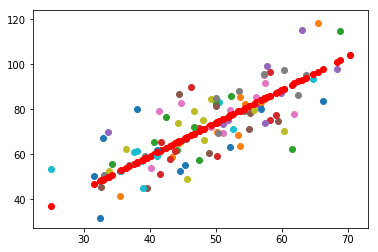

In [45]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

learning_rate: 0.000000


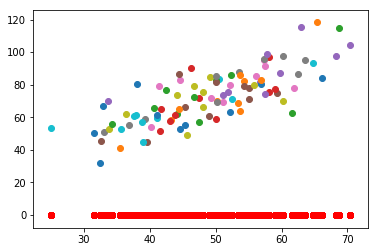

learning_rate: 0.000050


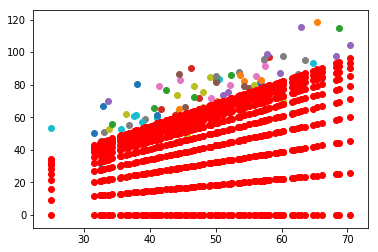

learning_rate: 0.000100


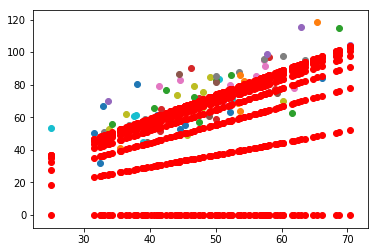

learning_rate: 0.000150


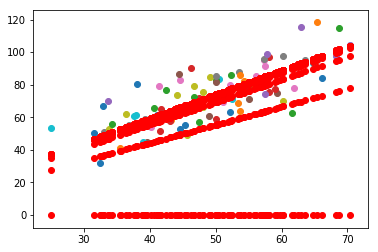

learning_rate: 0.000200


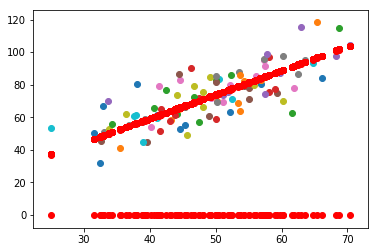

learning_rate: 0.000250


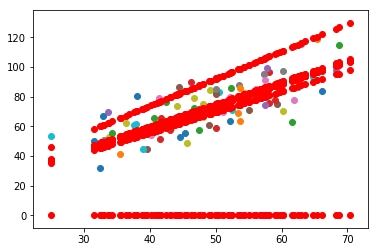

learning_rate: 0.000300


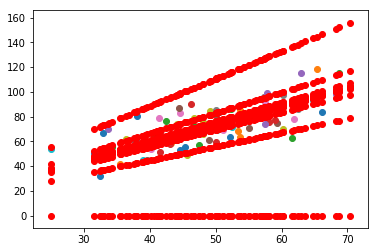

learning_rate: 0.000350


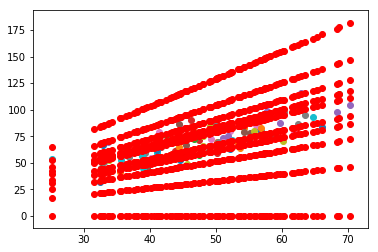

learning_rate: 0.000400


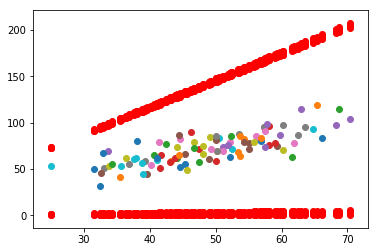

In [46]:
# Use this to visually discuss convergence rate based on learning rate
# This problem is very similar to the problem 3 part 2
# The box of code plot figures of convergence with different learning rate. The amount of red lines show the speed of convergence. 
# For example, learning rate of 0.0002 figure contains two obious red lines, which mean it only take of total of literation to converge. 
# When the learning rate start from really low number (close to 0), 
# the converence rate increases with increases of learning rate (0-0.0002).
# When the converage rate starts to reduce with increase of learning rate, (0.0002-0.00035)
# the algorithm might still converge until the learning rate is too big to converge.(>0.0004)

def gradient_descent_runner_new(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    for i in range(0,len(points)):
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    return [b, m]

def run_new2(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner_new(points, initial_b, initial_m, learning_rate, num_iterations)  
        
# Set a for loop to run various learning rate with different iteration 
interval = 0.00005        
for LR in range(0, 9):
    points = genfromtxt("../data/data.csv", delimiter=",")
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
    learning_rate = LR*interval
    print('learning_rate: %.6f' %learning_rate)
    for num in range(0,10):
        run_new2(num)
    plt.show()



## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.
Answer:Increase of learning rate causes the the convergence rate to increase as well until the learning rate reaches around 0.0002. When the learning rate is great than 0.0002, the increase of learning rate causes the the reduction of convergence rate until it does not converge at all due to large learning rate.

learning_rate: 0.000000
learning_rate: 0.000050
learning_rate: 0.000100
learning_rate: 0.000150
learning_rate: 0.000200
learning_rate: 0.000250
learning_rate: 0.000300
learning_rate: 0.000350
learning_rate: 0.000400


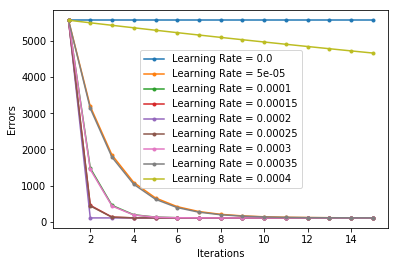

In [25]:
# Initialize error
errors = np.zeros((15,10))

# Define a new run function to adjsut learning rate, and gather data for error
def run_new(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors[num,LR] = compute_error_for_line_given_points(b, m, points)
    

    
# Set a for loop to run various learning rate with different iteration 
interval = 0.00005        
for LR in range(0, 9):
    learning_rate = LR*interval
    print('learning_rate: %.6f' %learning_rate)
    for num in range(0,15):
        run_new(num)

# Set a for loop to plot the error data
iteration = range(15)+ ones(15)
for LR in range(0,9):
    LearningRate = round(LR*interval,5)
    plt.plot(iteration,errors[:,LR],marker='.',label='Learning Rate = {}'.format(LearningRate))
    
    
plt.xlabel("Iterations")
plt.ylabel("Errors")
plt.legend()
plt.show()   